### Курсовой проект "Теория Вероятностей и Мат. Статистика"

В данном курсовом проекте рассматривается датасет с данными по пациентам с заболеваниями сердца (источник https://www.kaggle.com/ronitf/heart-disease-uci)

Датасет не требует предподготовки, поэтому можно сразу приступить к постановке и решению задач.

Рассмотрим следующие задачи:

1) Провести корреляционный анализ признаков: артериальное давление, уровень холестерина в крови, возраст пациента. Сделать выводы по получившимся результатам

2) Проверить на нормальность распределение данных в признаках: значение артериального давления, уровень холестерина в крови

3) Проверить гипотезу о том, что мат. ожидание значения артериального давления равно 130

Для начала импортируем все необходимые библиотеки и загружаем датасет в формате DataFrame

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Здесь интересующие нас признаки:
    
    1) trestbps - значение артериального давления пациента при поступлении в клинику (мг/л)
    3) age - возраст пациента
    2) chol - значение уровня содержания холестерина в крови пациента при поступлении в клинику

#### 1) Выполним корреляционный анализ значений артериального давления, возраста, а также уровня холестерина пациентов

В качестве числовой характеристики зависимости случайных величин используем __коэффициент корреляции Пирсона__:
$$r_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y}$$

Здесь $\sigma_X$, $\sigma_Y$ — среднее квадратическое отклонение.

Посчитаем коэффициент корреляции для выборок двух признаков:

In [2]:
df[['age', 'trestbps', 'chol']].corr()

,age,trestbps,chol
age,1.000000,0.279351,0.213678
trestbps,0.279351,1.000000,0.123174
chol,0.213678,0.123174,1.000000


Как видно из матрицы более-менее высокая корреляция между выбранными признаками отсутствует.

#### 2) Вторая задача - проверка на нормальность распределения значений артериального давления пациентов и содержания холестерина в крови

1-й метод - графический. Построим гистрограммы значений артериального давления и холестерина пациентов. Поверх них нарисуем функции плотностей для нормальных распределений с соответствующими параметрами.

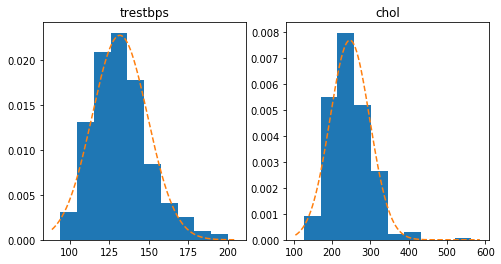

In [3]:
keys = ['trestbps', 'chol']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=10)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

2-й метод - с помощью Q-Q кривой

1) По данной выборке считаем выборочные среднее  $a$  и среднее квадратическое отклонение  $\sigma$

2) Для каждого значения  $\alpha \in (0, 1)$  откладываем по оси  $x$  квантиль порядка  $\alpha$  для нормального распределения с параметрами  $a$ ,  $\sigma$ , а по оси  $y$  — выборочный квантиль порядка  $\alpha$ .

Получившийся набор точек должен лежать на прямой  $f(x) = x$

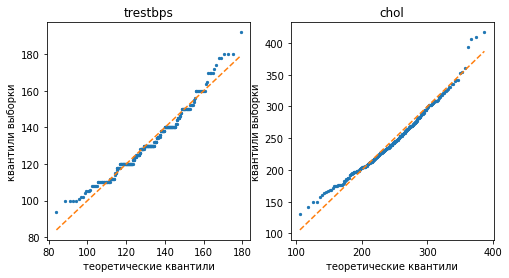

In [4]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

3-й метод оценить нормальность выборки — известные нам правила разброса для нормального распределения:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

In [5]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

trestbps
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.66996699669967
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9504950495049505
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9933993399339934

chol
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7293729372937293
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9636963696369637
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9867986798679867



Как видим из всех 3-х методов, распределения выборок артериального давления и уровня холестерина пациентов достаточно близки к нормальному.

#### 3) Проведем проверку гипотезы о том, что мат. ожидание значений артериального давления равно 130

Т.к. значение дисперсии неизвестно, то воспользуемся t-статистикой:

$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.

В предположении вероности гипотезы $H_0$ t-статистика имеет __распределение Стьюдента__ или __t-распределение__ с параметром $df = n - 1$.

Находим значение t-статистики:

In [6]:
samples = df['trestbps']

t = (samples.mean() - 130) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

t

1.6116108638133604

Находим границы критической области:

In [7]:
alpha = 0.05  #Уровень значимости
n = samples.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-1.967850227365727, 1.9678502273657266)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -1.967) \cup (1.967, \infty)$$

Т.к. значение статистики не попало в критическую область, то гипотеза о том, что мат. ожидание равно 130, подтверждается.